The plan with this notebook is to explore and take a look at the distributions of the original variables that I'll be working with in this project. I'll plan on looking at the majority of the variables both with and without outliers.

In [1]:
from dsfuncs.processing import remove_outliers
from dsfuncs.plotting import plot_var_dist, plot_binary_response
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_df(year): 
    """Read in a year's worth of data. 
    
    Args: 
        year: int
    """
    
    df = pd.read_csv('../../../data/csvs/detected_fires_' + str(year) + '.csv', true_values =['t', 'True'], false_values=['f', 'False'])
    return df

In [3]:
# Test out my function and see what columns I actually want to look at the distributions of. 
fires_df_2012 = read_df(2012)
fires_df_2012.columns

Index([u'ogc_fid', u'wkb_geometry', u'area', u'perimeter', u'fire_',
       u'fire_id', u'lat', u'long', u'date', u'julian', u'gmt', u'temp',
       u'spix', u'tpix', u'src', u'sat_src', u'conf', u'frp', u'fire_bool',
       u'urban_areas_bool', u'region_aland', u'region_awater', u'region_name',
       u'region_lsad', u'region_code', u'county_aland', u'county_awater',
       u'county_name', u'county_lsad', u'county_fips', u'state_aland',
       u'state_awater', u'state_name', u'state_lsad', u'state_fips'],
      dtype='object')

In [4]:
fires_df_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252439 entries, 0 to 252438
Data columns (total 35 columns):
ogc_fid             252439 non-null int64
wkb_geometry        252439 non-null object
area                252439 non-null float64
perimeter           252439 non-null float64
fire_               252439 non-null int64
fire_id             252439 non-null int64
lat                 252439 non-null float64
long                252439 non-null float64
date                252439 non-null object
julian              252439 non-null int64
gmt                 252439 non-null int64
temp                252439 non-null float64
spix                252439 non-null float64
tpix                252439 non-null float64
src                 252439 non-null object
sat_src             252439 non-null object
conf                252439 non-null int64
frp                 252439 non-null float64
fire_bool           252439 non-null bool
urban_areas_bool    252439 non-null bool
region_aland        247286 non-

In [5]:
# I'm going to look at the following set of continous and categorical variables. 
continous_vars = ['lat', 'long', 'gmt', 'temp', 'spix', 'tpix', 'conf', 'frp', 'county_aland', 'county_awater']
categorical_vars = ['urban_areas_bool', 'src', 'sat_src']

In [6]:
# Test out the outliers function to make sure it runs. 
print fires_df_2012['lat'].values.shape
print remove_outliers(fires_df_2012['lat']).shape

(252439,)
(248341,)


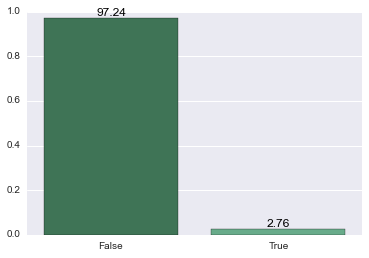

In [7]:
# Testing out the plot_var_dist function for a categorical variable. 
plot_var_dist(fires_df_2012['urban_areas_bool'], categorical=True)

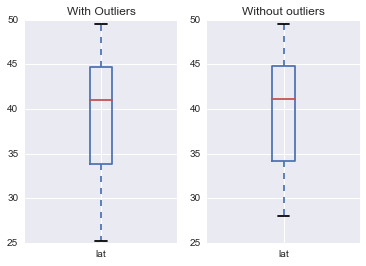

In [8]:
# Testing out the plot_var_dist function for a continuous variable. 
f, axes = plt.subplots(1, 2)
plot_var_dist(fires_df_2012['lat'], ax=axes[0:2])

In [9]:
def check_dists(year): 
    df = read_df(year)
    print 'Continuous Vars'
    print '-' * 50
    for var in continous_vars: 
        print 'Variable: {}'.format(var)
        f, axes = plt.subplots(1, 4)
        plot_var_dist(df.query('fire_bool == 0')[var], ax=axes[0:2], show=False)
        plot_var_dist(df.query('fire_bool == 1')[var], ax=axes[2:], show=False)
        plt.show()
    print 'Categorical Vars'
    print '-' * 50
    for var in categorical_vars: 
        print 'Variable {}'.format(var)
        f, axes = plt.subplots(1, 2)
        plot_var_dist(df.query('fire_bool == 0')[var], categorical=True, ax=axes[0], show=False)
        plot_var_dist(df.query('fire_bool == 1')[var], categorical=True, ax=axes[1], show=False)
        plt.show()

Continuous Vars
--------------------------------------------------
Variable: lat


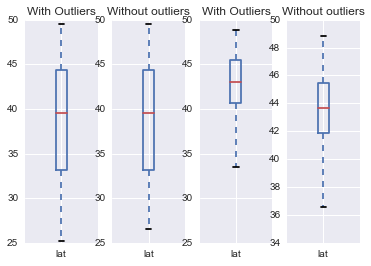

Variable: long


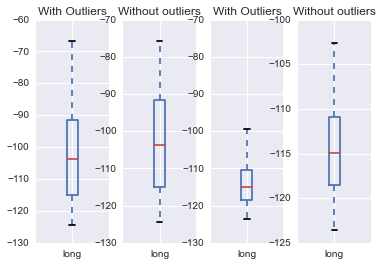

Variable: gmt


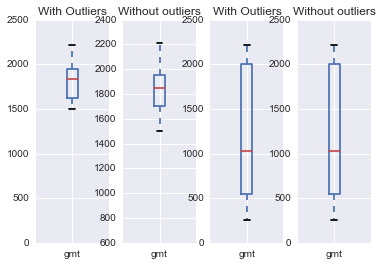

Variable: temp


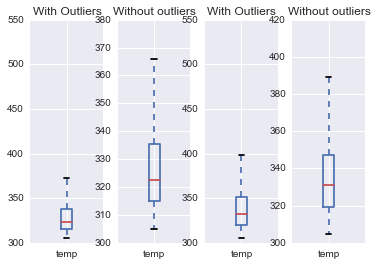

Variable: spix


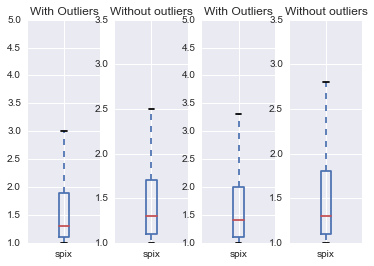

Variable: tpix


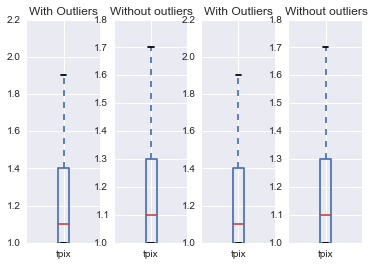

Variable: conf


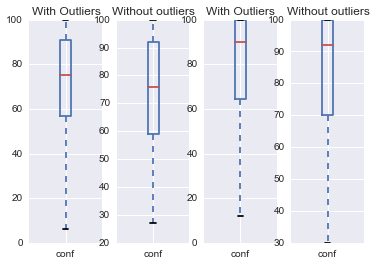

Variable: frp


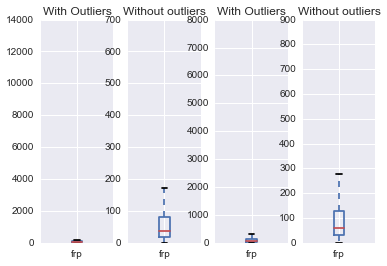

Variable: county_aland


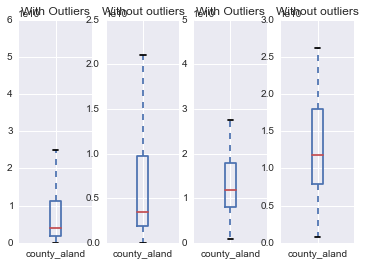

Variable: county_awater


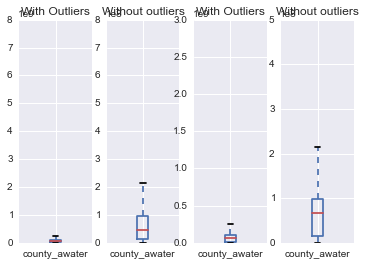

Categorical Vars
--------------------------------------------------
Variable urban_areas_bool


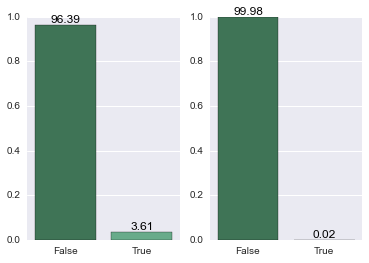

Variable src


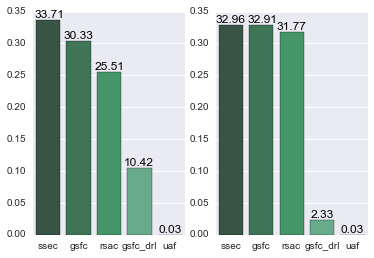

Variable sat_src


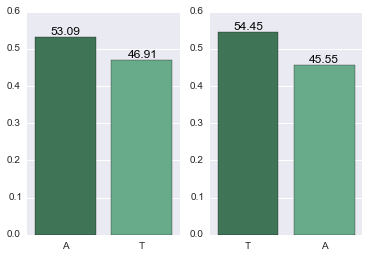

In [10]:
check_dists(2012)

Continuous Vars
--------------------------------------------------
Variable: lat


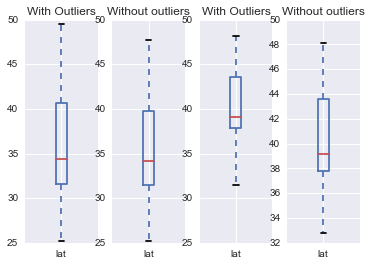

Variable: long


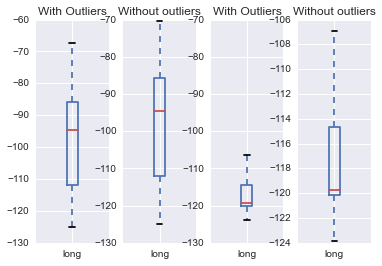

Variable: gmt


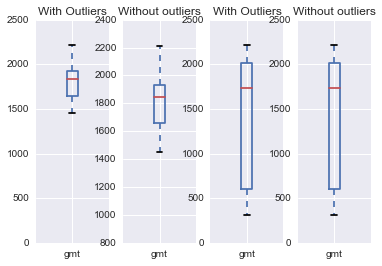

Variable: temp


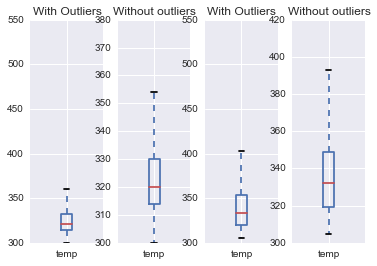

Variable: spix


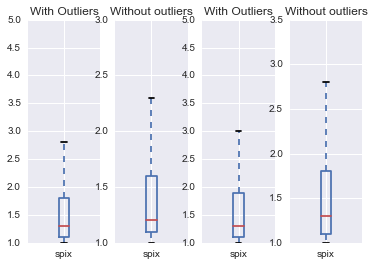

Variable: tpix


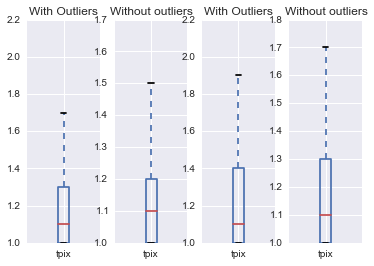

Variable: conf


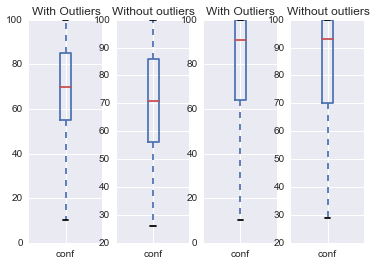

Variable: frp


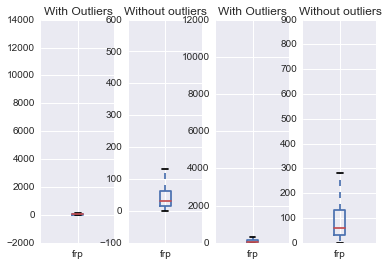

Variable: county_aland


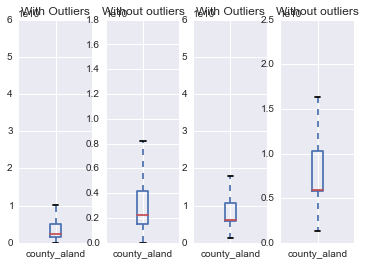

Variable: county_awater


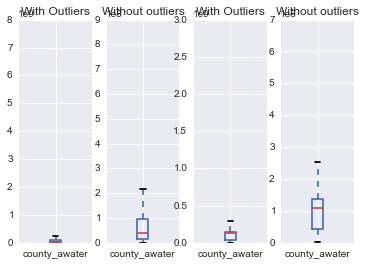

Categorical Vars
--------------------------------------------------
Variable urban_areas_bool


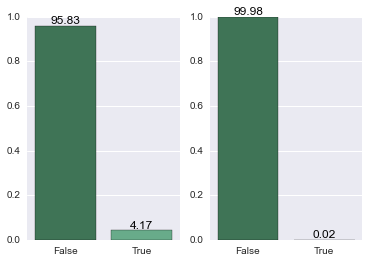

Variable src


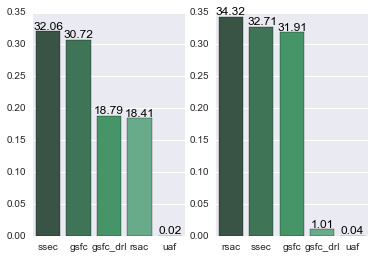

Variable sat_src


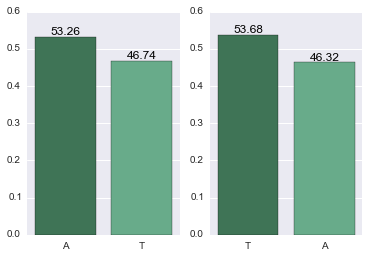

In [11]:
check_dists(2013)

/Users/sallamander/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (22,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Continuous Vars
--------------------------------------------------
Variable: lat


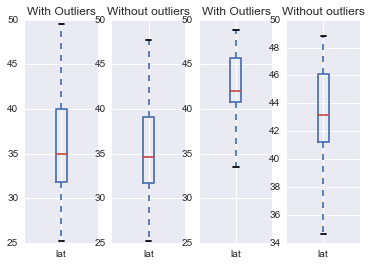

Variable: long


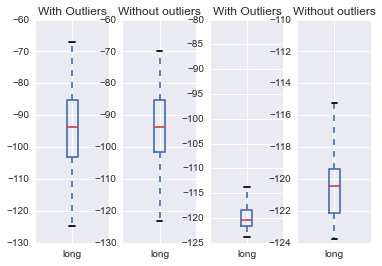

Variable: gmt


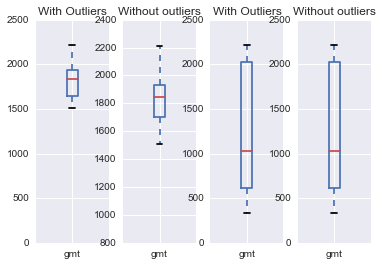

Variable: temp


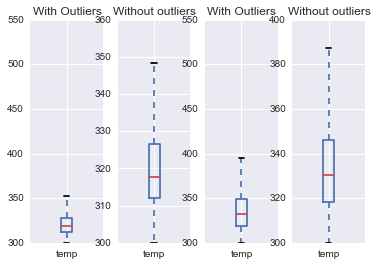

Variable: spix


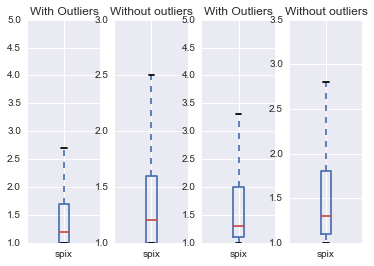

Variable: tpix


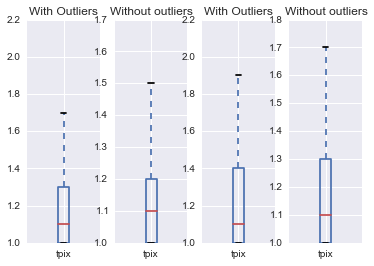

Variable: conf


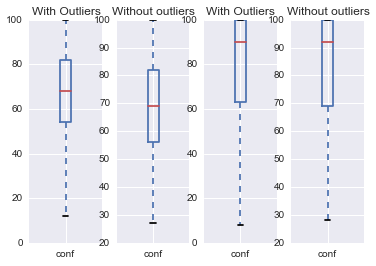

Variable: frp


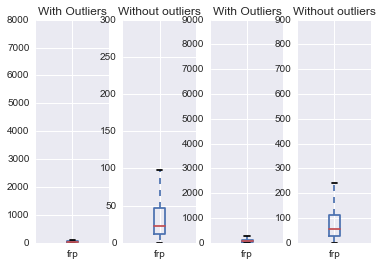

Variable: county_aland


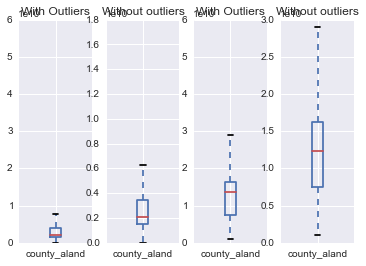

Variable: county_awater


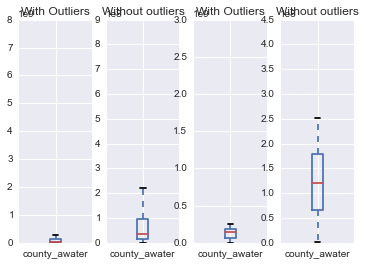

Categorical Vars
--------------------------------------------------
Variable urban_areas_bool


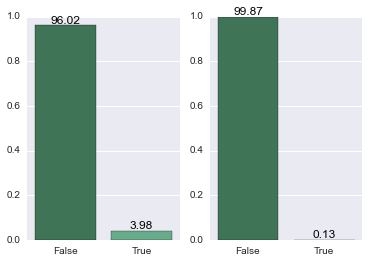

Variable src


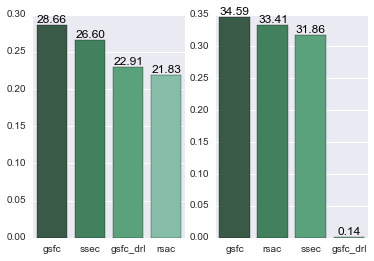

Variable sat_src


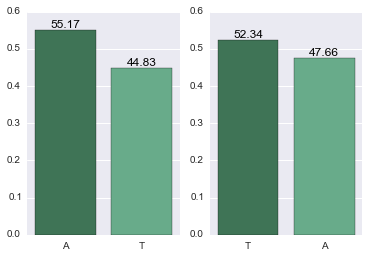

In [12]:
check_dists(2014)

Continuous Vars
--------------------------------------------------
Variable: lat


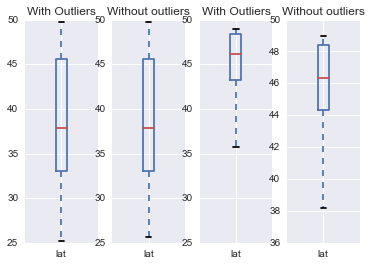

Variable: long


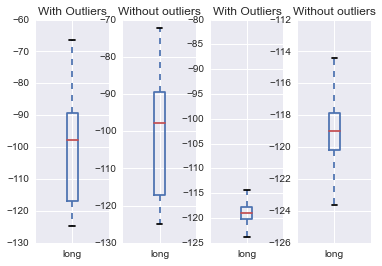

Variable: gmt


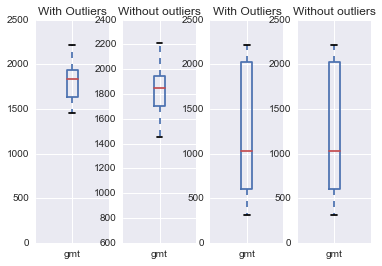

Variable: temp


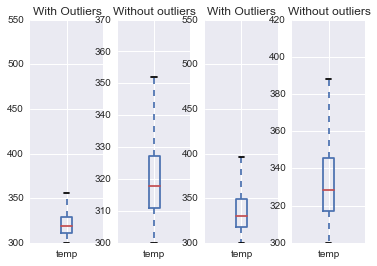

Variable: spix


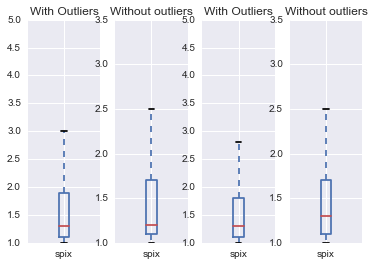

Variable: tpix


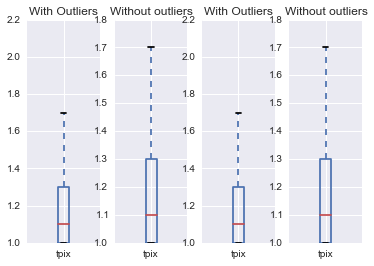

Variable: conf


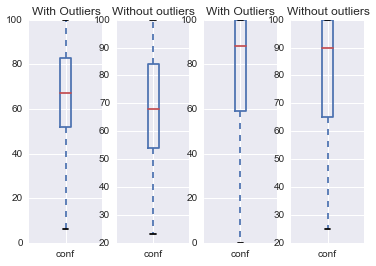

Variable: frp


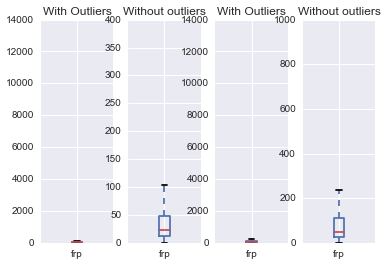

Variable: county_aland


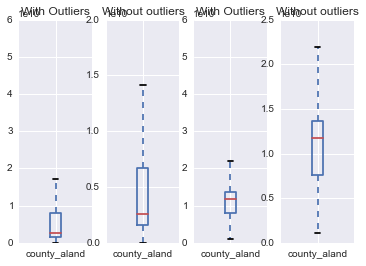

Variable: county_awater


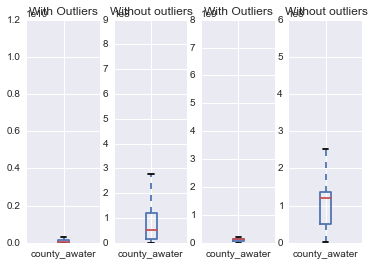

Categorical Vars
--------------------------------------------------
Variable urban_areas_bool


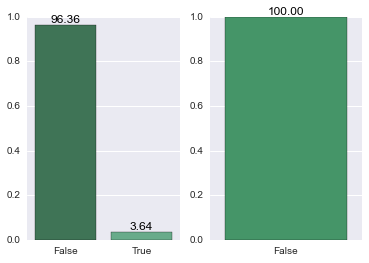

Variable src


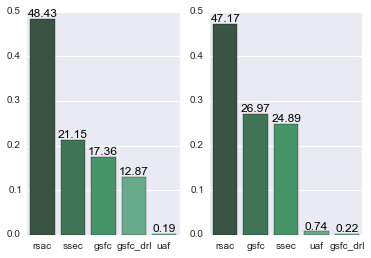

Variable sat_src


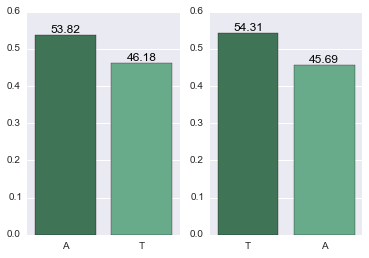

In [13]:
check_dists(2015)

#### Notes on distributions 

There are a couple of things worth nothing about these distributions above (These notes don't change too much if we change what we're calling outliers using 3 standard deviations instead of 2 - and I realize this use of outliers may not be the best. But, it just helps to get a sense of how the distributions look originally and after throwing out "outliers"). 

The latitude and longitude appear to be pretty informative - those observations that are actually fires are on average in locations we would expect more fires. What's interesting is that the distributions of latitude and longitude differ for fires as much as they do when we look at with and without "outliers". 

The gmt distributions are fairly interesting. If we look at those from non-fire observations, we see that the distribution is centered around times later in the day, around 1800. For fires, the times are pretty spread out, occuring at all times of the day. It seems logical, and at least somewhat supported by the data, that these non-fires that get labeled as fires are simply really hot surfaces, which peak in afternoon times. 

The average temp of fire observations is higher than non-fires, which isn't too surprising. The same holds true of the conf. variable, which also isn't surprising. The frp variable seems like it might on average be higher for fires than non-fires, which makes sense. It's a little hard to tell from the distributions above, though, how different frp is across fires and non-fires. The tpix and spix variables don't show any real differences between the fire and non-fire observations. The county area of land and county area of water only seem to show that larger counties on average have more fires. This is pretty intuitive. 

The urban areas bool suggests what we might expect - fires occur in non-urban areas only. The src variable shows something that looks interesting; those observations from the gsfc_drl make up a decent proportion of the non-fire observations, but almost none of the fire observations. It looks like having that as a dummy (and maybe one or two of the other observations) could potentially be helpful. The sat_src variable doesn't look like it'll be too helpful. 

In [14]:
def add_land_water_ratio(df):
    df.eval('land_water_ratio = county_aland / (county_aland + county_awater)')
    return df

def plot_land_water_ratio(year): 
    df = read_df(year)
    df = add_land_water_ratio(df)
    var = 'land_water_ratio'
    f, axes = plt.subplots(1, 4)
    fires = df.query('fire_bool == 0')[var]
    non_fires = df.query('fire_bool == 1')[var]
    print 'Fires mean: {}'.format(fires.mean())
    print 'Non Fires mean: {}'.format(non_fires.mean())
    plot_var_dist(fires, ax=axes[0:2], show=False)
    plot_var_dist(non_fires, ax=axes[2:], show=False)
    plt.show()

Year: 2012
--------------------------------------------------
Fires mean: 0.966216273281
Non Fires mean: 0.988764539683


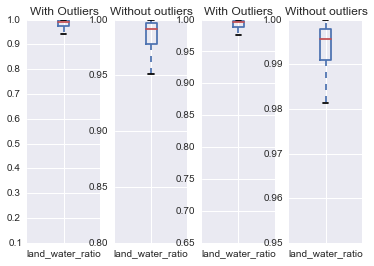

Year: 2013
--------------------------------------------------
Fires mean: 0.966216273281
Non Fires mean: 0.988764539683


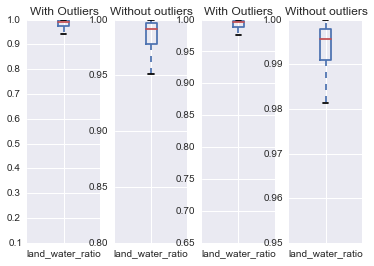

Year: 2014
--------------------------------------------------
Fires mean: 0.966216273281
Non Fires mean: 0.988764539683


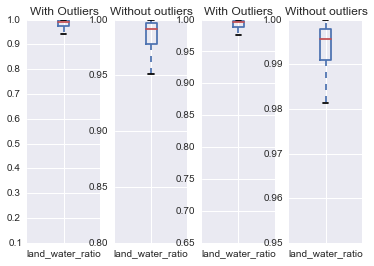

Year: 2015
--------------------------------------------------
Fires mean: 0.966216273281
Non Fires mean: 0.988764539683


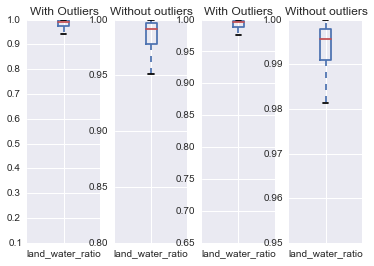

In [15]:
for year in xrange(2012, 2016): 
    print 'Year: {}'.format(str(year))
    print '-' * 50
    plot_land_water_ratio(2012)

#### Notes on land_water_ratio

The distributions for the ratio of land to total area (land plus water) are fairly interesting. I would have expected that the fires were in areas with a higher ratio of land to total area (i.e. less water), but the plots above don't seem to support this idea. They seem to suggest that this variable probably won't be too helpful. 

Year 2012
--------------------------------------------------
urban_areas_bool


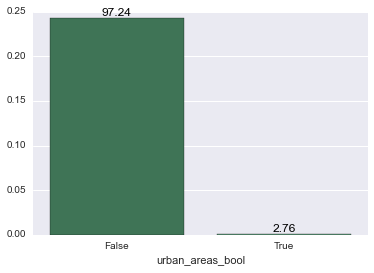

src


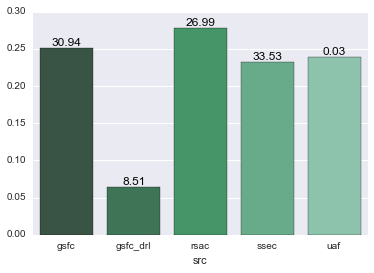

sat_src


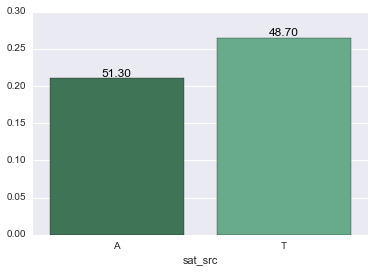

Year 2013
--------------------------------------------------
urban_areas_bool


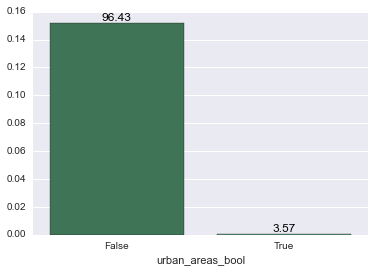

src


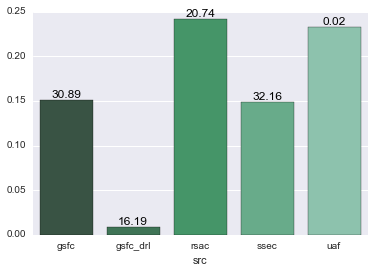

sat_src


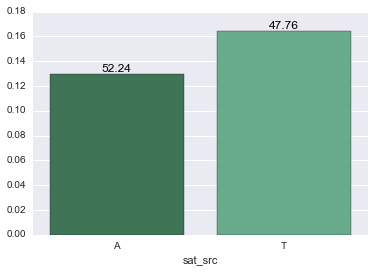

Year 2014
--------------------------------------------------
urban_areas_bool


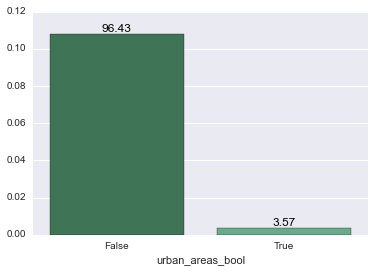

src


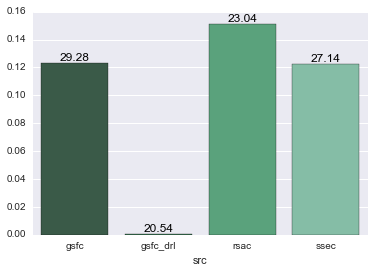

sat_src


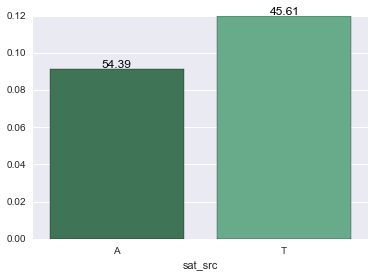

Year 2015
--------------------------------------------------
urban_areas_bool


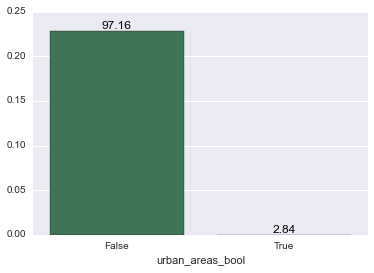

src


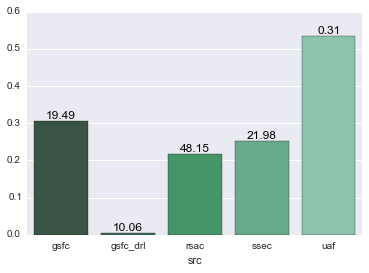

sat_src


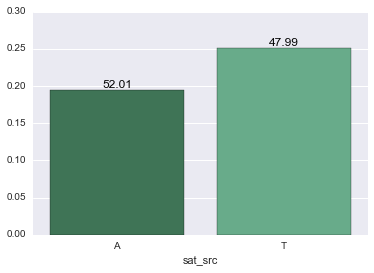

In [18]:
for year in xrange(2012, 2016): 
    df = read_df(year)
    print 'Year {}'.format(str(year))
    print '-' * 50
    for category in categorical_vars: 
        print category
        plot_binary_response(df, category, 'fire_bool')

#### Notes on the distribution of the response across categoricals 

I thought it would be useful to see what the percentage of fires was in each category (for those categorical variables), along with what percentage of the data set that category made up (which is shown in the text above the bars). I think there are two takeaways here: 

1. Almost none of the observations are from urban areas, **but** for those that are, almost none are fires. 
2. A small proportion of the observations have the `gsfc_drl` as the `src` variable. For those that do, though, a disproportionately small number are actually fires (relative to the other `src` categories). 